In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Display Images

In [2]:
def load_img(file_path: str) -> np.ndarray:
    pil_image = Image.open(file_path)
    return np.array(pil_image)

In [3]:
def img_to_gray(img_arr: np.ndarray) -> np.ndarray:
    return np.array(Image.fromarray(img_arr).convert('L'))

In [4]:
def show_img(img_arr: np.ndarray) -> None:
    if img_arr.ndim == 3:
        plt.figure(figsize=(10, 5))
        
        plt.subplot(1, 2, 1)
        plt.imshow(img_arr)
        plt.title('Color Image')
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.imshow(img_to_gray(img_arr), cmap='gray')
        plt.title('Gray Image')
        plt.axis('off')
        
        plt.show()
    else:
        plt.figure(figsize=(5, 5))
        
        plt.imshow(img_arr, cmap='binary')
        plt.colorbar()
        plt.title('Image')
        plt.axis('off')
        
        plt.show()

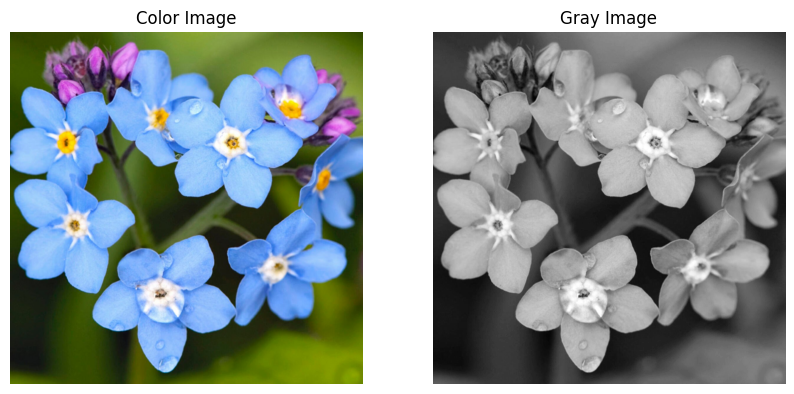

In [5]:
path = 'images/a.jpg'
# path = 'images/b.jpg'
# path = 'images/c.jpg'

image = load_img(path)
show_img(image)

In [6]:
# Convert Image to Gray-Scale if necessary
if image.ndim == 3:
    image = img_to_gray(image)

# Plot Diagrams

In [7]:
def plot_hist(img_arr: np.ndarray) -> None:
    fig, axs = plt.subplots(2, 1, figsize=(8, 8))

    hist, _, _ = axs[0].hist(img_arr.flatten(), bins=256)
    axs[0].set_title('Histogram')
    axs[0].grid(True)

    axs[1].plot(np.cumsum(hist))
    axs[1].set_title('Cumulative Sum')
    axs[1].grid(True)
    axs[1].set_xlabel('Pixel Brightness')

    plt.subplots_adjust(hspace=0.3)

    plt.show()

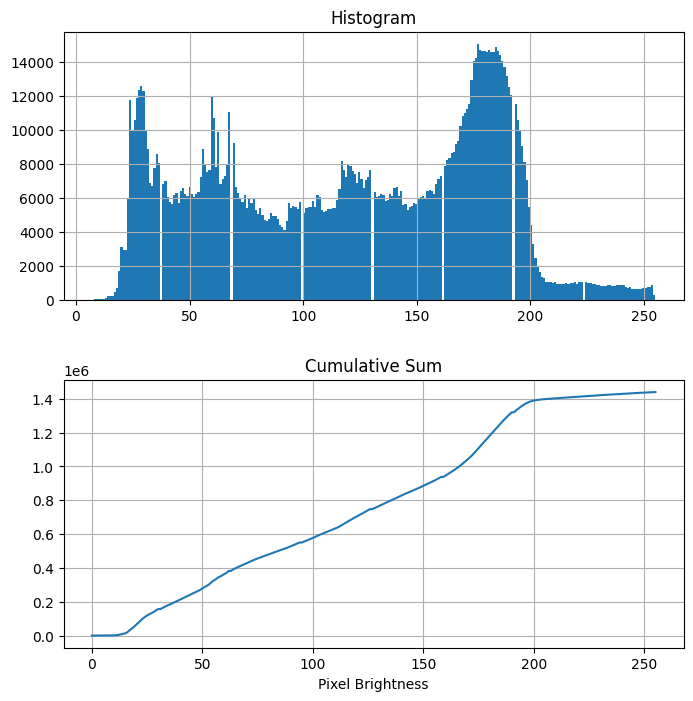

In [8]:
plot_hist(image)

# Intensity Transformation

In [9]:
def generate_img_via_lookup_table(img_arr: np.ndarray, lookup_table: np.ndarray) -> np.ndarray:
    darkest_px = img_arr.min()
    brightest_px = img_arr.max()
    
    normalized_img = (img_arr - darkest_px) / (brightest_px - darkest_px)
    index_img = np.floor(0.5 + normalized_img * (len(lookup_table) - 1)).astype(int)
    
    return lookup_table[index_img]

In [10]:
def generate_linear_lookup_table(img_arr: np.ndarray) -> np.ndarray:
    # Calculate cumulative distribution function (CDF)
    hist, bins = np.histogram(img_arr.flatten(), bins=256, range=(0, 256))
    cdf = hist.cumsum()
    
    # Normalize CDF to fit the range [0, 255]
    cdf_normalized = ((cdf - cdf.min()) * 255) / (cdf.max() - cdf.min())
    return cdf_normalized.astype(np.uint8)

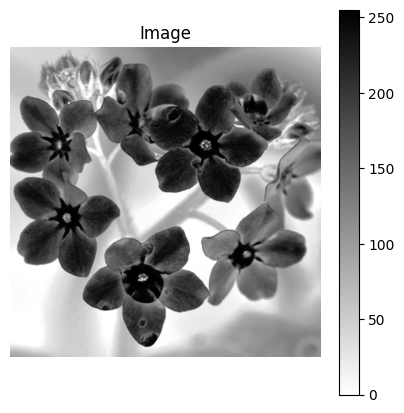

In [11]:
lookup_table = generate_linear_lookup_table(image)
new_image = generate_img_via_lookup_table(image, lookup_table)
show_img(new_image)

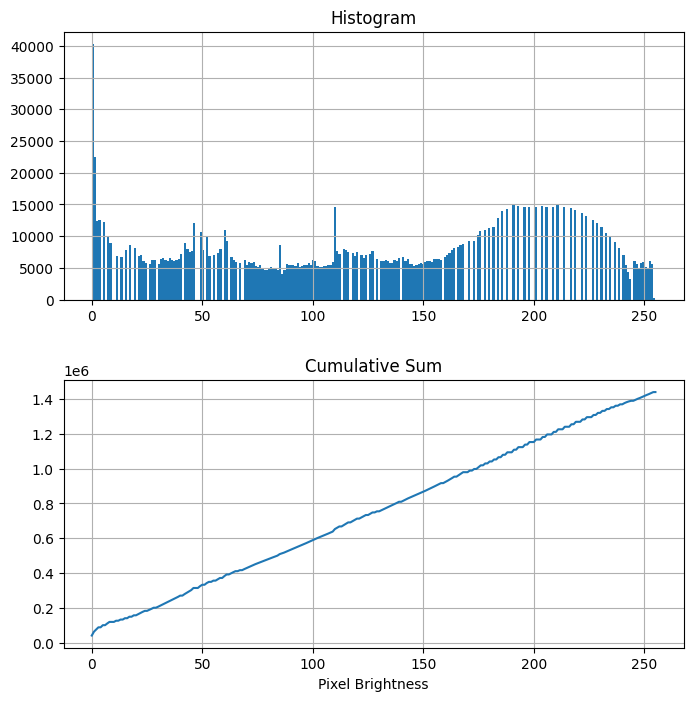

In [12]:
plot_hist(new_image)